In [ ]:
!pip install mlflow

In [3]:
import mlflow
import pandas as pd
import numpy as np
import os
import random
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

result = {'best_valid_score': 0.476, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.476), ('mrr@10', 0.4312), ('ndcg@10', 0.3745), ('hit@10', 0.7014), ('precision@10', 0.1372), ('map@10', 0.2813)]), 'test_result': None}
result

In [24]:
result

{'best_valid_score': 0.476,
 'valid_score_bigger': True,
 'best_valid_result': OrderedDict([('recall@10', 0.476),
              ('mrr@10', 0.4312),
              ('ndcg@10', 0.3745),
              ('hit@10', 0.7014),
              ('precision@10', 0.1372),
              ('map@10', 0.2813)]),
 'test_result': None}

### mlflow server 연결

In [4]:
remote_server_uri="http://101.101.219.178:30005"
mlflow.set_tracking_uri(remote_server_uri)

### 실험 생성 or 이미 존재한다면 id 가져오기

In [5]:
client = mlflow.tracking.MlflowClient()
experiment_name = "EASE" # experiment 이름
try:
    experiment_id = client.create_experiment(experiment_name)
except:
    experiment = client.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id
experiment_id

'744697751960066772'

In [23]:
run_name="EASE"
desc="Model path: ./saved/EASE-Feb-05-2023_05-23-53.pth"
with mlflow.start_run(run_name=run_name, description=desc, experiment_id=experiment_id) as run:
    for metric, score in result['best_valid_result'].items():
        print(metric,score)
        mlflow.log_metric(metric.replace('@','.'), score)

recall@10 0.476
mrr@10 0.4312
ndcg@10 0.3745
hit@10 0.7014
precision@10 0.1372
map@10 0.2813


result
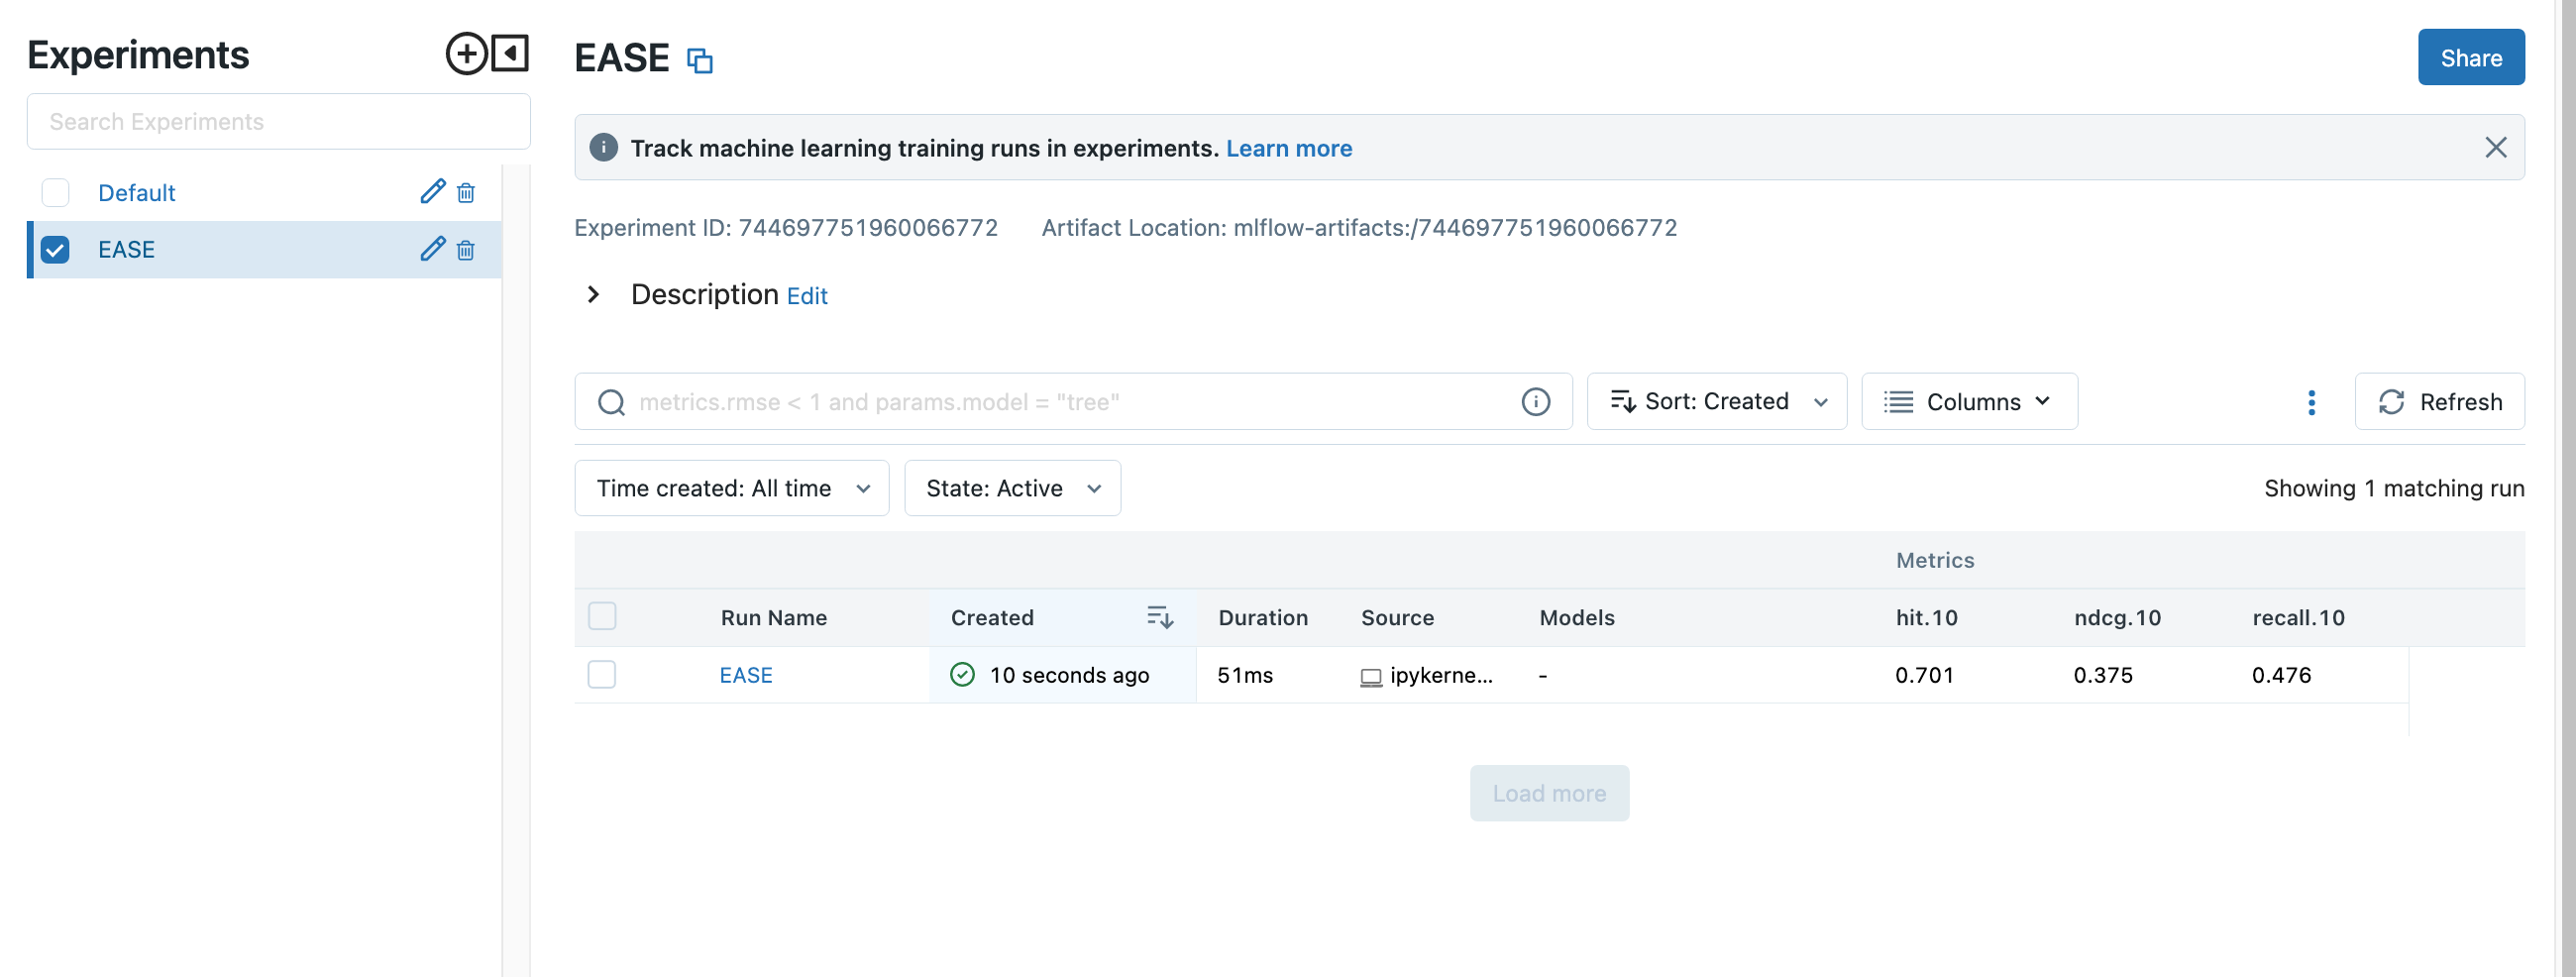